# Gradient Descent

An algorithm that can be used to minimize any cost function. First start off with some initial $w$ and $b$ (in linear regression this does not matter too much and both can be 0), then keep changing $w$ and $b$ to reduce $J(w,b)$ until we settle at or near a minimum (not guaranteed a global minimum). Gradient descent gives the direction of steepest descent.

## Implementation

We can write the following implementation of the idea

\begin{align}
&\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} \\[6pt]
\end{align}

where $\alpha$ is called the learning rate and controls the step size of the descent. It is usually a small quantity. As a sidenote, both parameters must be updated simultaneously when coding. If we compute the partial derivatives using our squared error cost function we get

\begin{align}
\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)x_{j}^{(i)} \\[6pt]
\end{align}

which turns our resulting algorithm into

\begin{align}
&\theta_j := \theta_j - \frac{\alpha}{m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)x^{(i)} \\[6pt]
\end{align}

With a squared error cost function we are guaranteed only one minima since it is a convex function. This kind of gradient descent where the whole training set is used is called batch gradient descent. Other gradient descents may use only subsets of the training data.

## Code Example

Note that the following uses $w=\theta_1$ and $b=\theta_0$

In [5]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

Consider the following dataset

In [6]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

### Cost Function

In [7]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = len(x)
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

### Gradient Function

In [8]:
def compute_gradient(x, y, w, b): 
    
    m = len(x)   
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        err = f_wb - y[i]
        dj_dw_i = err * x[i] 
        dj_db_i = err 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

### Gradient Descent

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw
        
    return w, b,

(w,b) found by gradient descent: (199.9929,100.0116)


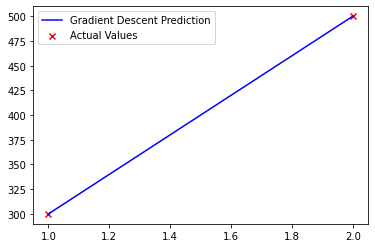

In [10]:
# initialize parameters
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2


w_final, b_final = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

f_wb = np.zeros(len(x_train))
for i in range(len(x_train)):
    f_wb[i] = w_final * x_train[i] + b_final


plt.plot(x_train, f_wb, c='b',label='Gradient Descent Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.legend()
plt.show()